# Sprint 18

## Dataset creation

### [Problem 1] Learning classification with self-made dataset

In [1]:
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
%matplotlib inline

path = 'training'
flist = os.listdir(path)

In [2]:
flist

['cat1.jpg',
 'cat1.xml',
 'cat2.jpg',
 'cat2.xml',
 'cat3.jpg',
 'cat3.xml',
 'cat4.jpg',
 'cat4.xml',
 'cat5.jpg',
 'cat5.xml',
 'dog1.jpg',
 'dog1.xml',
 'dog2.jpg',
 'dog2.xml',
 'dog3.jpg',
 'dog3.xml',
 'dog4.jpg',
 'dog4.xml',
 'dog5.jpg',
 'dog5.xml']

In [3]:
img_list = glob.glob(path + '/*' + ".jpg")

(224, 224, 3)


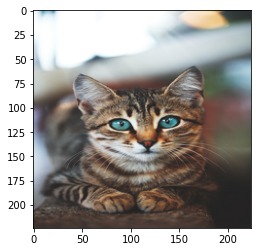

In [4]:
cat_img = Image.open(img_list[1])
cat_img = cat_img.resize((224, 224))
cat_img = np.array(cat_img)
print(cat_img.shape)
plt.imshow(cat_img)

In [5]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:

    if re.search('dog', img):      
        dog_img_ = Image.open(img)
        dog_img_ = dog_img_.resize((224, 224))
        dog_img = np.array(dog_img_)
        dog_img = dog_img / 255.
        dog_img = dog_img.reshape((1,224,224,3))  
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)

    if re.search('cat', img):
        cat_img_ = Image.open(img)
        cat_img_ = cat_img_.resize((224, 224))
        cat_img = np.array(cat_img_)
        cat_img = cat_img / 255.
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
img_array = np.concatenate([dog_img_array, cat_img_array], axis=0)
img_array.shape

(10, 224, 224, 3)

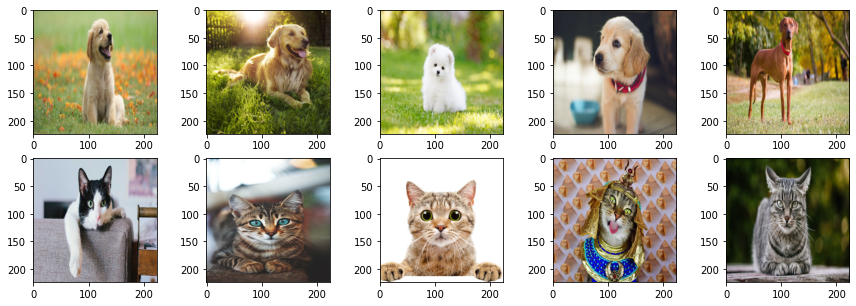

In [6]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img_array[i])

In [7]:
d_img_array = np.empty((0,224,224,3))

for img in img_list:

    d_img = Image.open(img)
    d_img = d_img.resize((224, 224))
    d_img = np.array(d_img)
    d_img = d_img / 255.0
    d_img = d_img.reshape((1,224,224,3))
    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

print(d_img_array.shape)
X = d_img_array

(10, 224, 224, 3)


In [8]:
Y = []
for i in  img_list:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)
Y = np.array(Y)
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X, Y, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 1000us/step - loss: 0.6738 - accuracy: 0.8000
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 2.8795 - accuracy: 0.3000
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 2.1968 - accuracy: 0.6000
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 0.8162 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 1ms/step - loss: 1.3638 - accuracy: 0.3000
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.8000
Epoch 8/20
1/1 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7000
Epoch 9/20
1/1 [==============================] - 0s 999us/step - loss: 0.3257 - accuracy: 0.8000
Epoch 10/20
1/1 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9000
Epoch 11/20
1/1 [=================

In [12]:
Y_pred = np.round(model.predict(X))

In [13]:
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [14]:
Y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, Y_pred)

array([[5, 0],
       [0, 5]], dtype=int64)

### [Problem 2] Data expansion for classification dataset

In [16]:
!pip install albumentations

In [17]:
new_img_list = []
transforms = []

In [18]:
import albumentations as A

# Declare an augmentation pipeline
transforms.append(A.Compose([
    A.ChannelShuffle(),
    A.RandomBrightnessContrast(p=0.2),
]))
transforms.append(A.Compose([
    A.ColorJitter(),
    A.GaussianBlur(),
    A.SafeRotate()
]))
transforms.append(A.Compose([
    A.ToGray()
]))
transforms.append(A.Compose([
    A.HorizontalFlip(p=0.5)
]))
transforms.append(A.Compose([
    A.ChannelShuffle(),
    A.Solarize()
]))

for transform in transforms:
    for img in img_list:
        image = Image.open(img)
        image = image.resize((224, 224))
        image = np.array(image)

        # Augment an image
        transformed = transform(image=image)
        transformed_image = transformed["image"] / 255.0

        new_img_list.append(transformed_image)
        
Y_test = np.repeat(Y, len(transforms))

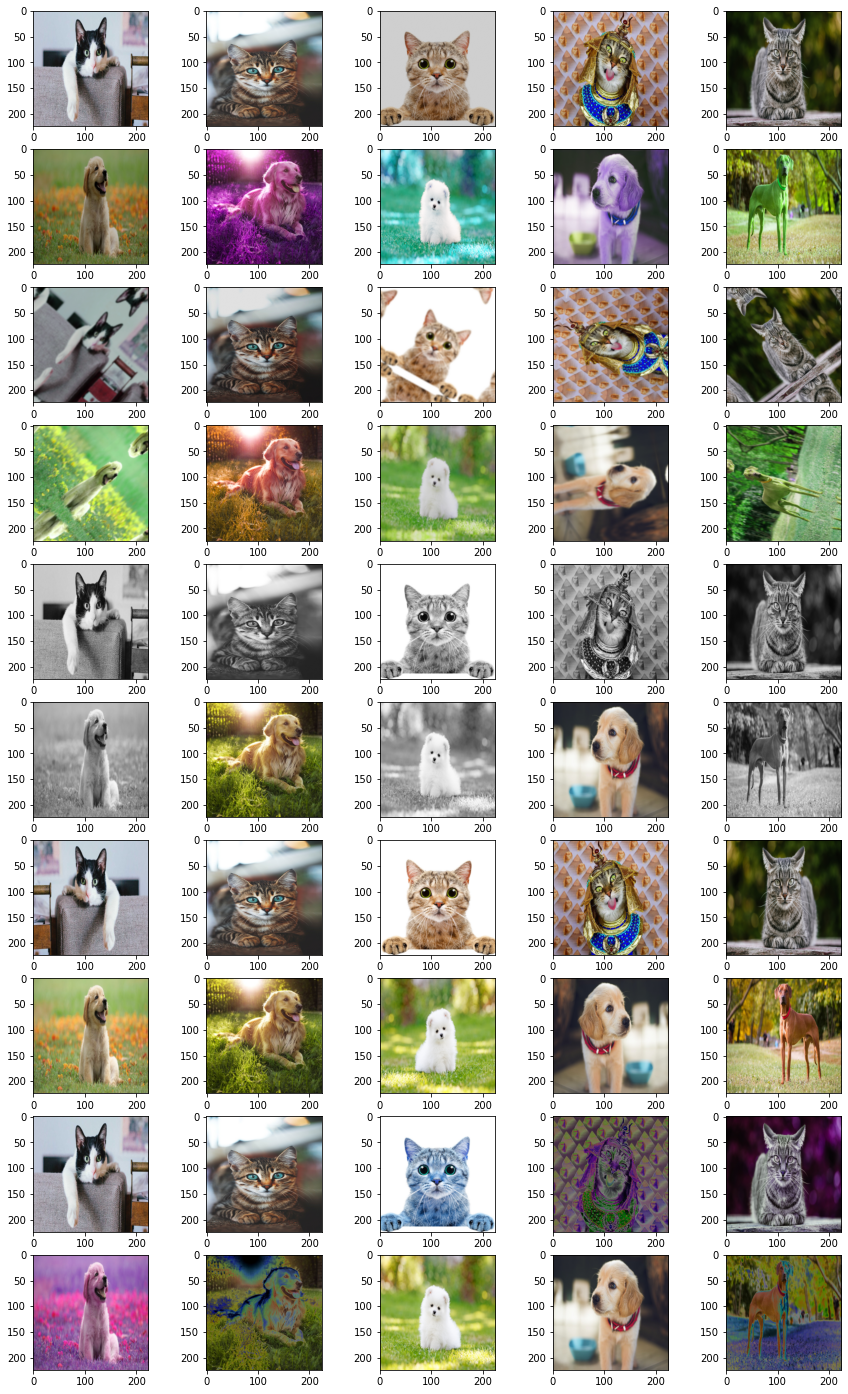

In [19]:
plt.figure(figsize=(15,25))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.imshow(new_img_list[i])

In [20]:
X_test = np.array(new_img_list)

In [21]:
Y_pred = np.round(model.predict(X_test))
Y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [22]:
confusion_matrix(Y_test, Y_pred)

array([[19,  6],
       [15, 10]], dtype=int64)

### [Problem 3] Preparation of object detection dataset

In [23]:
!pip install labelImg

### [Problem 4] Data expansion for object detection dataset

In [24]:
img_bbox_xmls = glob.glob(path + '/*' + ".xml")
img_bbox_xmls

['training\\cat1.xml',
 'training\\cat2.xml',
 'training\\cat3.xml',
 'training\\cat4.xml',
 'training\\cat5.xml',
 'training\\dog1.xml',
 'training\\dog2.xml',
 'training\\dog3.xml',
 'training\\dog4.xml',
 'training\\dog5.xml']

In [25]:
import xml.etree.ElementTree as ET

In [26]:
annotations = []
category_id_to_name = {0: 'cat', 1: 'dog'}
# annotations = {'image': image, 'bboxes': [[20,10,150,240]], 'category_id': [1]}
for i, xml in enumerate(img_bbox_xmls):
    tree = ET.parse(xml)
    root = tree.getroot()
    obj = root[6]
    bndbox = obj[4]
    obj_name = obj[0].text
    image = Image.open(img_list[i])
    x, y = image.size
    image = image.resize((224, 224))
    image = np.array(image)
    d = {
        'image': image,
        'bboxes': [[
            int(bndbox[0].text) / x,
            int(bndbox[1].text) / y,
            int(bndbox[2].text) / x,
            int(bndbox[3].text) / y,
        ]],
        'category': [obj_name]
    }
    annotations.append(d)

In [27]:
transforms = []
bbox_params = A.BboxParams(format='albumentations', min_area=0, min_visibility=0, label_fields=['category'])
transforms.append(A.Compose([
    A.ChannelShuffle(),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=bbox_params))
transforms.append(A.Compose([
    A.ColorJitter(),
    A.GaussianBlur(),
    A.SafeRotate()
], bbox_params=bbox_params))
transforms.append(A.Compose([
    A.ToGray()
], bbox_params=bbox_params))
transforms.append(A.Compose([
    A.HorizontalFlip(p=0.5)
], bbox_params=bbox_params))
transforms.append(A.Compose([
    A.ChannelShuffle(),
    A.Solarize()
], bbox_params=bbox_params))

In [28]:
class_labels=['cat', 'dog']
obj_img_list = []
for transform in transforms:
    for annot in annotations:
        # Augment an image
        transformed = transform(**annot)
        obj_img_list.append(transformed)

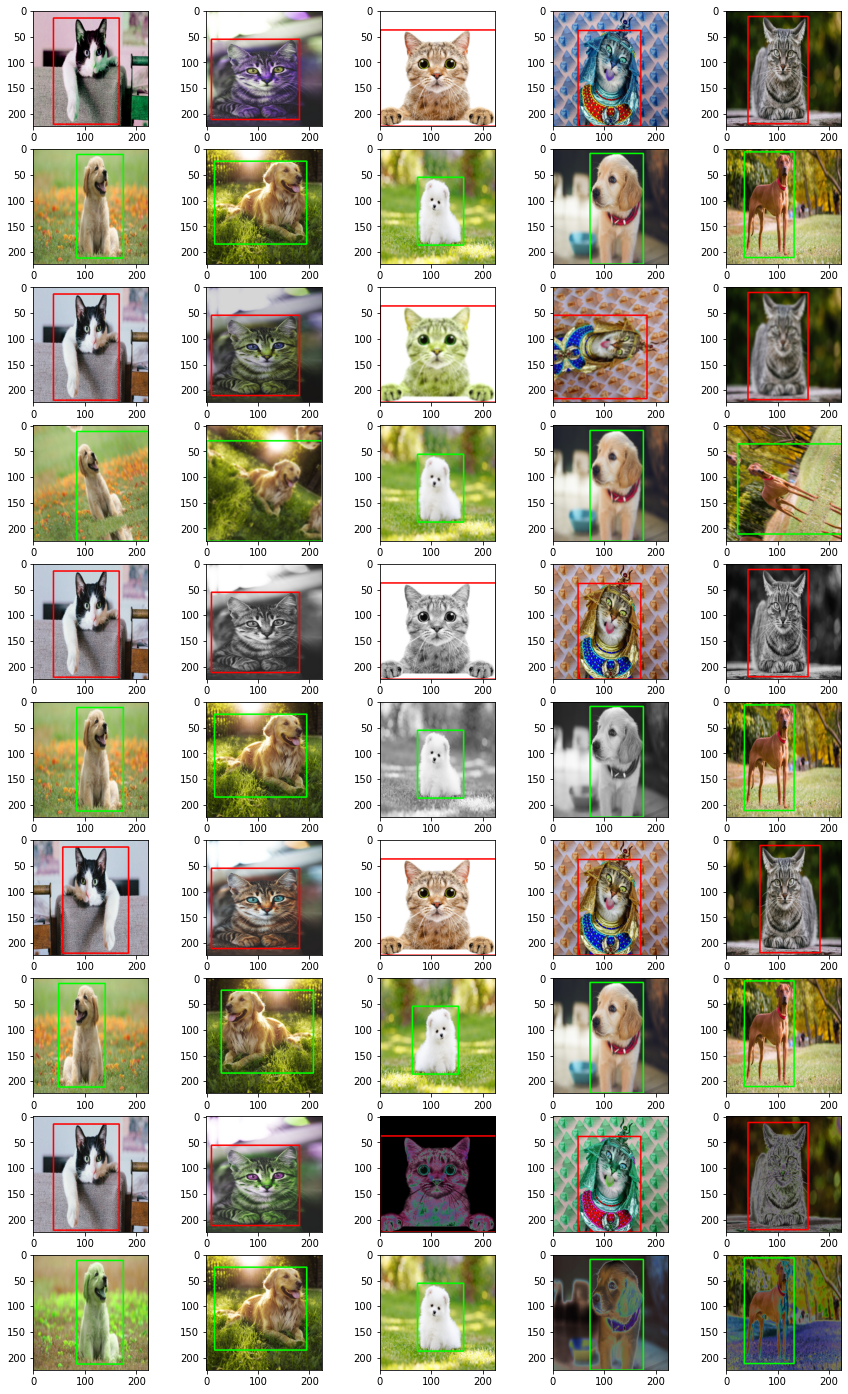

In [29]:
import matplotlib.patches as patches

plt.figure(figsize=(15,25))
for i in range(50):
    plt.subplot(10, 5, i+1)
    img = np.ascontiguousarray(obj_img_list[i]["image"])
    bbox = (np.array(obj_img_list[i]["bboxes"][0]) * 224.0).astype('int64')
    cv2.rectangle(
        img,
        (bbox[0], bbox[1]), (bbox[2], bbox[3]),
        color=(255,0,0) if obj_img_list[i]["category"][0] == 'cat' else (0,255,0),
        thickness=2
    )
    plt.imshow(img)